# LIBRARY

In [1]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

# DATA SOURCE

In [2]:
path = "C:/Users/JamesDuong/.wdm/drivers/chromedriver/win32/87.0.4280.88/chromedriver.exe"
driver = webdriver.Chrome(path)
#driver = webdriver.Chrome(ChromeDriverManager().install())

data_source = "https://www.instagram.com/explore/tags/marketing/"

# GET POSTS' URL

In [566]:
driver = webdriver.Chrome(PATH)
driver.get(data_source)

# Login
# driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[3]/div/span/a[1]/button').click()
# time.sleep(1)
# driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[5]/button/span[2]').click()
# time.sleep(1)
# username = 'duonghoanvu1@yahoo.com.vn'
# password = pwd
# driver.find_element_by_xpath('//*[@id="email"]').send_keys(username)
# driver.find_element_by_xpath('//*[@id="pass"]').send_keys(password)
# driver.find_element_by_xpath('//*[@id="loginbutton"]').click()


post_id = set()

# Scroll page
lenOfPage = driver.execute_script('window.scrollTo(0, document.body.scrollHeight); var lenOfPage=document.body.scrollHeight; return lenOfPage;')
match=False

# Top_posts
top_posts = set()
[top_posts.add(each_post.get_attribute('href')) for each_post in driver.find_element_by_class_name('EZdmt').find_elements_by_tag_name('a')]

i = 0
while(match==False):
        lastCount = lenOfPage
        
        lenOfPage = driver.execute_script('window.scrollTo(0, document.body.scrollHeight); var lenOfPage=document.body.scrollHeight; return lenOfPage;')
        
        
        # [post_id.add(each_post.find_element_by_tag_name('a').get_attribute('href')) for each_post in driver.find_elements_by_class_name('_bz0w')]
        try:
            [post_id.add(each_post.find_element_by_tag_name('a').get_attribute('href')) for each_post in driver.find_elements_by_class_name('_bz0w')]
        except:
            continue
        time.sleep(0.5)
        
        if lastCount == lenOfPage:
            if i < 3:
                continue
            
            match=True
        
        i += 1
        if i == 3:
            break

In [568]:
top_posts

{'https://www.instagram.com/p/CGc-Ac2pidq/',
 'https://www.instagram.com/p/CGdAwTwBnFz/',
 'https://www.instagram.com/p/CGdbUCNg9y-/',
 'https://www.instagram.com/p/CGdflZ9HJxt/',
 'https://www.instagram.com/p/CGdiibElGgB/',
 'https://www.instagram.com/p/CGdxS5YgIKp/',
 'https://www.instagram.com/p/CGeBcsuA8Zx/',
 'https://www.instagram.com/p/CGeEbDVHjz1/',
 'https://www.instagram.com/p/CGeQ2h9j7ea/'}

# CLEANING DATA

In [569]:
recent_posts = post_id-top_posts

In [570]:
Dict_image = {'photo_link': [],
              'likes': [],
              'comments': [],
             'time_stamp': [],
             'city': [],
             'country':[]}

Dict_video = {'video_link': [],
              'likes': [],
              'comments': []}

i = 0
for post in recent_posts:
    i += 1
    try:
        driver.get(post)
        shortcode = driver.current_url.split('/')[-2]

        # Extract all info
        script_info = driver.find_element_by_xpath("//script[@type='application/ld+json']").get_attribute('innerHTML')

        info = json.loads(script_info)
        likes = info['interactionStatistic']['userInteractionCount']
        comments = info['commentCount']

        try:
            city = info['contentLocation']['address']['addressLocality']
            country = info['contentLocation']['address']['addressCountry']['name']
        except:
            city = 'unknown'
            country = 'unknown'

        time_stamp = info['uploadDate']

        Dict_image['photo_link'].append(post)
        Dict_image['likes'].append(likes)
        Dict_image['comments'].append(comments)
        Dict_image['city'].append(city)
        Dict_image['country'].append(country)
        Dict_image['time_stamp'].append(time_stamp)

        #print(post, likes, comments)
    except:
        continue

In [571]:
info

{'@context': 'http://schema.org',
 '@type': 'ImageObject',
 'caption': 'True success is all about working towards meaningful goals and dreams.\nMy first Goal is to be a chief minister of India.👨\n.\n.\n.\n.\n.#socialmedia #socialism #social #socialmediamarketing #like4like #love #socialist #marketing #socialismo #instagood #instagram #socialize #socialnetwork #socialjustice #socialite #photooftheday #art #socialemotionallearning',
 'representativeOfPage': 'http://schema.org/True',
 'uploadDate': '2020-10-18T09:36:09',
 'author': {'@type': 'Person',
  'alternateName': '@manishdevadwall',
  'mainEntityofPage': {'@type': 'ProfilePage',
   '@id': 'https://www.instagram.com/manishdevadwall/'}},
 'comment': [{'@type': 'Comment',
   'text': 'Bjp💖😘',
   'author': {'@type': 'Person',
    'alternateName': '@_sumit_dubey_',
    'mainEntityofPage': {'@type': 'ProfilePage',
     '@id': 'https://www.instagram.com/_sumit_dubey_/'}}},
  {'@type': 'Comment',
   'text': '@_sumit_dubey_ Haan bhai 🔥🔥',
  

In [572]:
df = pd.DataFrame(data=Dict_image)
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
df

,photo_link,likes,comments,time_stamp,city,country
0,https://www.instagram.com/p/CGevAANjNmL/,0,0,2020-10-18 09:41:45,unknown,unknown
1,https://www.instagram.com/p/CGeu-8zn5gE/,2,0,2020-10-18 09:41:36,unknown,unknown
2,https://www.instagram.com/p/CGeuZcOALIm/,0,0,2020-10-18 09:36:29,Bandung,ID
3,https://www.instagram.com/p/CGeu6VuhpSK/,1,0,2020-10-18 09:41:36,unknown,unknown
4,https://www.instagram.com/p/CGeuzIRDQO1/,3,0,2020-10-18 09:39:59,unknown,unknown
...,...,...,...,...,...,...
76,https://www.instagram.com/p/CGeuyFxpY51/,0,1,2020-10-18 09:39:51,unknown,unknown
77,https://www.instagram.com/p/CGeuoE2lnca/,40,0,2020-10-18 09:38:43,unknown,unknown
78,https://www.instagram.com/p/CGdTkf8hBRh/,15,0,2020-10-17 20:22:49,unknown,unknown
79,https://www.instagram.com/p/CGeuXeKFjDR/,1,0,2020-10-18 09:36:13,Shepton Mallet,GB


In [574]:
df['likes'] = df['likes'].astype(int)
df['comments'] = df['comments'].astype(int)

df['time_stamp'] = df['time_stamp'].dt.round('min')
df['date'] = df['time_stamp'].dt.date
df['hour'] = df['time_stamp'].dt.hour

In [575]:
df

,photo_link,likes,comments,time_stamp,city,country,date,hour
0,https://www.instagram.com/p/CGevAANjNmL/,0,0,2020-10-18 09:42:00,unknown,unknown,2020-10-18,9
1,https://www.instagram.com/p/CGeu-8zn5gE/,2,0,2020-10-18 09:42:00,unknown,unknown,2020-10-18,9
2,https://www.instagram.com/p/CGeuZcOALIm/,0,0,2020-10-18 09:36:00,Bandung,ID,2020-10-18,9
3,https://www.instagram.com/p/CGeu6VuhpSK/,1,0,2020-10-18 09:42:00,unknown,unknown,2020-10-18,9
4,https://www.instagram.com/p/CGeuzIRDQO1/,3,0,2020-10-18 09:40:00,unknown,unknown,2020-10-18,9
...,...,...,...,...,...,...,...,...
76,https://www.instagram.com/p/CGeuyFxpY51/,0,1,2020-10-18 09:40:00,unknown,unknown,2020-10-18,9
77,https://www.instagram.com/p/CGeuoE2lnca/,40,0,2020-10-18 09:39:00,unknown,unknown,2020-10-18,9
78,https://www.instagram.com/p/CGdTkf8hBRh/,15,0,2020-10-17 20:23:00,unknown,unknown,2020-10-17,20
79,https://www.instagram.com/p/CGeuXeKFjDR/,1,0,2020-10-18 09:36:00,Shepton Mallet,GB,2020-10-18,9


In [576]:
df[df['hour'] == 0]

,photo_link,likes,comments,time_stamp,city,country,date,hour


In [580]:
df['date'].min()

datetime.date(2020, 10, 13)

In [581]:
df['date'].max()

datetime.date(2020, 10, 18)

In [582]:
hour_likes = df.groupby(['hour'])['likes'].agg(['sum', 'mean', 'count']) # df.groupby(['hour'])[['likes']].sum() # == df.groupby(['hour'])['likes'].agg(['sum'])
hour_likes

,sum,mean,count
hour,,,
3,7,7.000000,1
8,44,14.666667,3
9,228,3.211268,71
10,8,8.000000,1
11,9,9.000000,1
15,35,35.000000,1
20,43,14.333333,3


# GRAPH PLOTING

<AxesSubplot:xlabel='hour', ylabel='sum'>

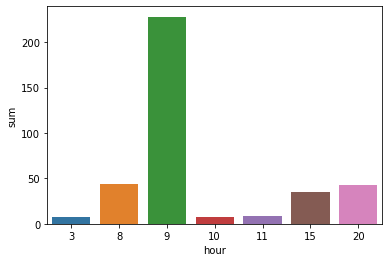

In [578]:
sns.barplot(x=hour_likes.index, y=hour_likes['sum'])

<AxesSubplot:xlabel='hour', ylabel='mean'>

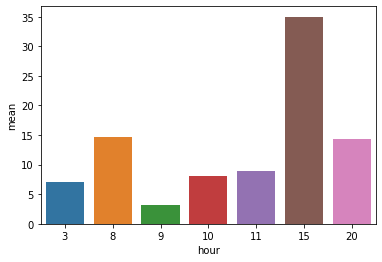

In [579]:
sns.barplot(x=hour_likes.index, y=hour_likes['mean'])

<AxesSubplot:xlabel='hour', ylabel='count'>

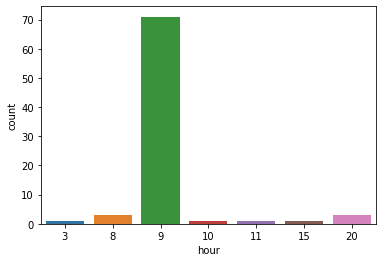

In [583]:
sns.barplot(x=hour_likes.index, y=hour_likes['count'])